In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from data_provider.data_factory import Dataset_ETT_minute, Dataset_Custom
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


/home/lirannoc/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/lirannoc/.conda/envs/ltsf6/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
root_path = {}
data_path = {}


root_path['ili'] = './dataset/illness/'
data_path['ili'] = 'national_illness.csv'


root_path['ETTm2'] = './dataset/ETT-small/'
data_path['ETTm2'] = 'ETTm2.csv'


root_path['ECL'] = './dataset/electricity/'
data_path['ECL'] = 'electricity.csv'


root_path['Exchange'] = './dataset/exchange_rate/'
data_path['Exchange'] = 'exchange_rate.csv'


root_path['traffic'] = './dataset/traffic/'
data_path['traffic'] = 'traffic.csv'


root_path['weather'] = './dataset/weather/'
data_path['weather'] = 'weather.csv'




In [3]:

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


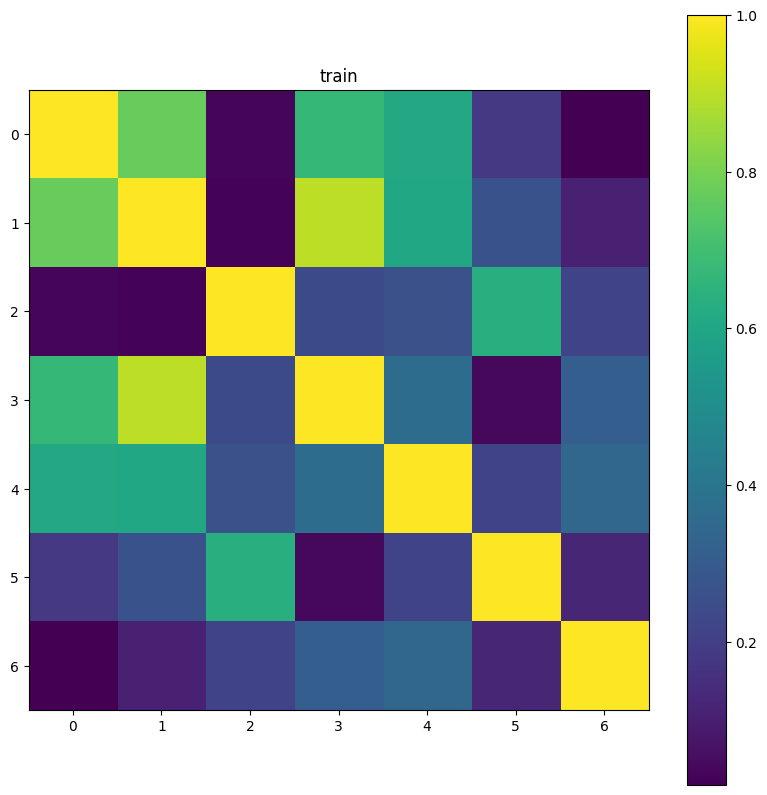

number of cluster: 2
cluster labels : [1 1 0 1 1 0 0]


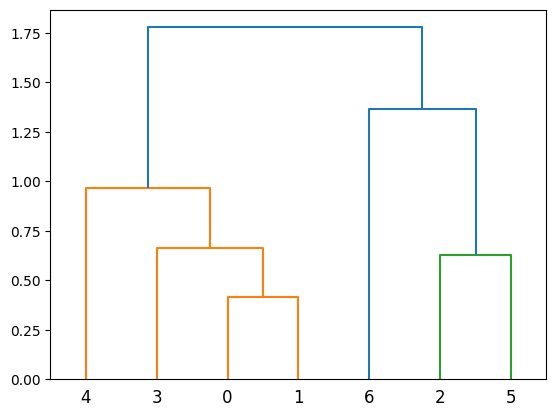

In [4]:

# choose dataset!

dataset = 'ETTm2' #ili, Exchange, traffic etc

data = Dataset_Custom(root_path =root_path[dataset],
                      data_path = data_path[dataset],
                      flag = 'train',
                      features = 'M',
                      timeenc = 1)
data = data.data_x.T
size = data.shape[1]


aa = np.arange(0,size)
x = torch.tensor(data)
corr = torch.corrcoef(x).numpy()
plt.figure(figsize=(10,10))
cluster_dist = 0.5
corr = np.abs(corr)

plt.imshow(corr)
plt.colorbar()
plt.title("train")
plt.show()


clustering = AgglomerativeClustering(compute_full_tree =True,
                                                             linkage='complete',
                                                             compute_distances =True).fit(-corr+1)

d = plot_dendrogram(clustering, truncate_mode="level", p=3)
clustering_labels = clustering.labels_

print("number of cluster:",len (np.unique(clustering_labels)))
print("cluster labels :", clustering_labels)

